**Data** **Understanding**

A. Introduction - Bank Marketing 
1. Background and Motivation:
EU banks experienced a deposit surge from June 2017 to June 2021, particularly post-COVID. The deposit increase was driven by increased savings and reduced spending due to uncertainty about the economy's future. (Europe Bank Deposits After COVID-19, n.d.). 
  
Fig 1						     	Fig 2
Fig. 1. EU deposit trend by geography regarding trillion (Europe Bank Deposits After COVID-19, n.d.)
Fig 2. Data-driven marketing maturity statistics (Marous, 2022) illustrate that the banking sector needs to catch up in adopting data-driven marketing.

Banks continue to utilise telemarketing for product and service promotion, but this method is often inefficient, time-consuming, and ineffective in acquiring new clients.

2. Business Problem:
Portuguese banks must adapt to new strategies and utilise machine learning for predictive insights to enhance their ability to promote term deposits and compete with the rest of EU banks.
A.	Targeted Marketing: Banks can improve conversion rates by targeting clients based on model predictions rather than a general approach.
B.	Optimisation of resources: Predictive predictions are crucial for optimising bank resources, particularly telemarketing personnel, to enhance cost efficiency and return on investment by focusing on likely subscribers.
C.	Personalisation of Client Interactions: Machine learning enables banks to identify client data patterns and adjust their interactions, enhancing their offerings' appeal.

Thus, the bank's promotional activities must be enhanced to increase efficiency and effectiveness by devising a machine-learning model to identify clients' responses to term deposit marketing campaigns.

B. Data Understanding and Preparation
1. Data Characteristics:
The dataset contains 41,188 bank client records, including 20 input attributes, with a target variable labeled "y" indicating term deposit subscription with no missing values but 12 duplicate rows have been identified. The dataset comprises both numeric and categorical attributes. 
 	   
2. Data Exploration:
	  
  
The dataset is imbalanced, with most values being "no" in column 'y'. Clients are mostly in their 20s to 40s, whereas younger individuals lack investment experience, and older ones are hesitant to invest in risky investments.
  
The histogram of the distribution of y by month indicates that the telemarketing campaign should focus on April to August for optimal marketing success, as Portuguese bonuses are typically paid in June, aligning with the histogram of euribor3m vs y vs month. (Dzhambazova, 2023)
 
The histogram of the distribution of y by duration reveals that telemarketing calls typically last 101-200 seconds, with calls lasting 201-300 seconds having the highest success in attracting clients, aligning with the mean duration of 258 seconds, suggesting that telemarketers should aim for 201-300 seconds.
 
The correlation heatmap reveals duration as the most correlated feature with target variable y, followed by nr.employed, suggesting increased client confidence in a bank with more employees, and euribo3m, indicating the importance of deposit interest.

3. Preparation:
Delimiter: To separate the semicolon character and split the values in each row into separate columns. 
Drop duplicates: To remove duplicate rows. 
LabelEncoder: Categorical variables need to be converted into dummy variables for machine learning models. Columns_to_encode include 'job','marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', and 'day_of_week'. Converting them into dummy variables expands the number of columns to around 50. A label encoder labels each category within each column, maintaining consistency.
Train test split: The dataset is split into a training and testing set at 80%-20% ratios, using SMOTE oversampling and RandomUnderSampler to balance the training set. The numerical features are standardised using StandardScaler.
  

C. Model Design and Result Illustration
1. Model Design:
Given that our target variable is binary ("yes" or "no"), we implemented a classification approach using binary variables, including Logistic Regression, Decision Trees, Random Forest, and Support Vector Machine, Multi-layer Perceptron, and Voting Classifier, to efficiently identify new clients likely to invest in term deposits, optimising resources, enhancing its promotion and competitiveness with EU banks.
a)	Logistic Regression (LR):
The algorithm is a widely used model suitable for the banking sector for binary classification problems, predicting client acceptance of term deposits and enhancing promotional strategies.
●	Predictive Output: LR provides a probability score between 0 and 1 for each customer, showcasing their likelihood to subscribe.
b) 	Decision Trees (DT):
The algorithm effectively classifies datasets by dividing them into subsets based on feature values, resulting in a tree that can be easily visualized and interpreted to show the relationships.
●	Predictive Output: Binary outputs based on subscription likelihood and also offer probability scores to gauge the prediction's certainty.
c) 	Random Forest (RF):
Random Forest, a combination of multiple decision trees, effectively prevents overfitting and offers more accurate predictions than a single decision tree.
●	Predictive Output: Similar to DT, binary outputs are based on subscription likelihood and also offer probability scores to gauge the prediction's certainty.
d) 	Support Vector Machines (SVM):
Due to their strength in high-dimensional spaces, SVMs are effective in binary classification of diverse, non-linear data like telemarketing. We hope they can identify hidden patterns by finding the hyperplane that separates the datasets.	
●	Predictive Output: Determines the hyperplane that separates the data and classifies clients based on this boundary.
e) 	Multi-layer Perceptron (MLP):
MLP can discover non-linear patterns and complex relationships in the data, which is helpful for telemarketing data.
●	Predictive Output: A neural network's prediction on whether a customer will subscribe or not based on the learned patterns in the data.
f) 	Voting Classifier:
Ensemble models, like voting classifiers, enhance bank predictions by combining multiple models' strengths, reducing potential shortcomings and providing more reliable predictions.
●	Predictive Output: A collective decision based on the predictions from the ensemble of models.

2. Model Construction:
All models were constructed using Google Colab, ensuring a seamless environment for data processing and model building. Here are the parameter settings for each:
●	LR: max_iter: 1000 (We had increased it to try to ensure convergence due to the large size of the dataset), random_state: 42 (For consistent results across the runs)
●	DT: full tree and pruned tree max 5 at 42 default settings with Fig 40,40. 
●	RF: n_estimators=100, max_features = "sqrt", random_state=42
●	SVM:  kernel='rbf', random_state=42
●	MLP: random_state=1, hidden_layer_sizes= (20,10), activation = 'relu', max_iter=2000
●	Voting Classifier: Comprised of the above models with soft voting to ensure probabilities were considered.

3. Model Evaluation and Interpretation:
a)	LR:
●	Performance: Achieved an accuracy of 85% on the test set.
●	Interpretation: The logistic regression model's coefficients reveal which features significantly influence predictions, such as "euribom3", suggesting higher interest increases the likelihood of accepting term deposits, suggesting banks should telemarket more during high-interest periods. 
●	Model results: 
●	There seems to be more features with a negative influence on the target variable. This can be seen by more features having negative coefficients.
●	The intercept, which is the baseline prediction, is 0.1533061.
 
●	Statsmodel: The statsmodels Logit model was initialised using the default parameters.
○	Pseudo R-squared: It measures the goodness of fit. Our result is an infinity value, which is one of the challenges which we had faced.
○	Coefficients: The majority of the features have negative coefficients
○	P>|z|: Most variables have p-values less than 0.05, indicating statistical significance, while 'education' and 'previous' have p-values higher than 0.05, suggesting they may not be significant predictors.
 
●	Model Performance Evaluation: The logistic regression model excels in identifying Class 0 ('No') with an F1-Score of 91 but struggles to distinguish Class 1 ('Yes') with an F1-Score of 57%, despite undersampling and oversampling was carried out to try to balance the data.
●	Confusion Matrix Graph: The graph shows similar information where the model struggles to identify Class 1 where there are more False Positives than True Positives.
     
b) 	DT:
●	Performance: The pruned tree reached an accuracy of 88.795% on training data and an accuracy of 85.066% for testing data. It is noted that DT struggles to identify true positives.
●	Interpretation: Decision trees aid banks in understanding decision-making processes, with critical factors like "duration" / "x[10]" at the top node. This insight suggests that banks should train telemarketers to engage clients longer, as highlighted in data exploration.
   
						  
c) 	RF:
●	Performance: Accuracy of 88%. RF handles slightly better in identifying true positives.
●	Interpretation: Random forests also give a feature importance metric. In this instance, it is the same as the decision tree, where 'duration' is the most important.
     
d) 	SVM:
●	Performance: SVM has an accuracy of 85% but similarly struggles with true positives.
●	Interpretation: SVMs, while powerful, are less interpretable directly. However, their strength lies in working efficiently with higher-dimensional data, which means they can handle many features and interactions effectively. Their success might indicate complex relationships in the data, suggesting banks incorporate more nuanced strategies.
      
e) 	MLP:
●	Performance: MLP, with its deep architecture, achieved an accuracy of 87%.
●	Interpretation: The neural network has three layers: an input layer, a first hidden layer with 20 neurons, and a second hidden layer with 10 neurons. Banks can invest more to analyse more in-depth data to unearth these hidden patterns and refine their strategies.
   
f) 	Voting Classifier:
●	Performance: Surpassing most models, except RF, achieved an accuracy of 87.86%.
●	Interpretation: The ensemble method combines the strengths of various models, ensuring a more robust prediction. Its success underscores the idea that a multi-faceted approach to understanding customer behaviour can be more effective, drawing insights from different models. However, it is noted that RF has the highest accuracy.
 
 

Overview
Random forest, with the highest accuracy score, is the most effective model for identifying potential clients to subscribe to term deposits. It estimates key variables for classification, crucial for targeted marketing, resource optimisation, and client interaction personalisation. The model's accuracy on the test set is approximately 88.2%.

D. Discussion & Concluding Remark
1. Summary and Implications:
Overview: Our research commenced with the challenge faced by Portuguese banks where conventional marketing avenues are inefficient in promoting term deposits, especially post-COVID-19. To address this, we employed a suite of machine learning algorithms, from the fundamental Logistic Regression to ensemble methodologies like the Voting Classifier.
Patterns and Discoveries:
●	Influential Variables: The research uncovered a significant relationship between variables and the likelihood of a client subscribing to a term deposit. For instance, attributes like call duration, euribo3m interest rates, and number of employees in the bank held pronounced influence in our models.
●	Model Variances: Each model has its unique strengths and shortcomings. For instance, while Decision Trees provided a transparent, intuitive understanding of decisions, they required pruning to avoid overfitting. The Voting Classifier, conversely, consolidated strengths from various models. However, its accuracy was below Random Forest, where it also has the highest F1-score for identifying true positives.

Implications and Deployment Suggestions:
●	Tailored Marketing: Banks can design personalised campaigns by understanding call duration and training telemarketers for more extended conversations or using digital platforms for interactive engagement with potential clients.
●	Resource Optimisation: Our predictive models enable the bank to use machine learning algorithms to identify potential clients, prioritise leads, improve resource allocation, minimise wasted efforts, and increase objectives.

2. Limitations and Concluding Remarks:
Limitations:
●	Data Imbalance: The inherent imbalance in the dataset, with fewer subscribers, poses challenges. Although we employed techniques like SMOTE, synthetic data might not capture all nuances of the minority class.
●	External Factors: While our models account for several influencing variables, significant events like global economic downturns, pandemics, war, or geopolitical events are beyond the predictive scope of our current models.
●	Scope of Data: The data is specific to Portuguese banks and might not cater to global banking network, highlighting the need for region-specific datasets and models when expanding scope.
●	Relevancy:  Data and patterns observed are bound by time, and economic, social, and technological landscapes changes over time. The data collected from 2008 to 2013 might be less relevant today.

 
Concluding Remarks and Further Steps:
In the intricate dance of numbers, patterns, and predictions, what stands out is the transformative capability of data. Our research, grounded in rigorous analysis, paves the way for Portuguese banks to rethink and reshape their marketing strategies.
Future endeavours could explore:
●	Global Analysis: The Machine Learning model is currently limited to Portugal's banks, but it could be applied globally for financial product telemarketing, considering cultural norms and country regulations, for example in Singapore the PDPA and Do-Not-Call registry, among others. (PDPC | Do Not Call Registry and Your Business, n.d.)
●	Feedback Loop Integration: Integrating a feedback loop where models are retrained based on their prediction outcomes for a truly adaptive system could ensure continuous learning and adaptation can help ensure the banks stay relevant and updated.

The data-driven approach is not a one-time venture. It requires consistent updating, re-evaluation, and fine-tuning to stay relevant.
 
References:
Europe bank deposits after COVID-19. (n.d.). S&P Global Market Intelligence. Retrieved October 21, 2023, from https://www.spglobal.com/marketintelligence/en/news-insights/latest-news-headlines/europe-bank-deposits-continue-to-increase-after-covid-19-spike-66729421 
Marous, J. (2022, October 3). Banking Needs To Prepare For Marketing’s Data Arms Race. The Financial Brand. https://thefinancialbrand.com/news/data-analytics-banking/banking-financial-marketing-data-arms-race-ai-maturity-trends-119312/
Moro, S., Cortez, P., & Rita, P. (2014, June 1). A data-driven approach to predict the success of bank telemarketing. Decision Support Systems; Elsevier BV. https://doi.org/10.1016/j.dss.2014.03.001 
H. (2020, July 10). Bank Marketing + Classification + ROC,F1,RECALL. . . Kaggle. https://www.kaggle.com/code/henriqueyamahata/bank-marketing-classification-roc-f1-recall 
S. (n.d.). GitHub - sukanta-27/Predicting-Success-of-Bank-Telemarketing: Given the Bank customer relationship data, predict whether a customer will subscribe to a term deposit or not. GitHub. https://github.com/sukanta-27/Predicting-Success-of-Bank-Telemarketing 
H. (2018, June 8). Bank Marketing - Imbalanced Dataset 94%. Kaggle. https://www.kaggle.com/code/henriqueyamahata/bank-marketing-imbalanced-dataset-94 
Rajawat, A. S. (2023, July 7). Voting Classifiers in Machine Learning - Amit Singh Rajawat - Medium. Medium. https://medium.com/@imamitsingh/voting-classifiers-in-machine-learning-a532935fe592 
Bank Telemarketing Analysis : Predicting customers’ responses to future marketing campaigns. (n.d.). https://yfsui.github.io/Bank-Telemarketing-ML-Project/
Dzhambazova, I. (2023, July 24). Benefits. Boundless. https://boundlesshq.com/guides/portugal/benefits/
R, A. (2023, October 6). How Long Should A Cold Call Last? [Original Study]. Klenty Blog. https://www.klenty.com/blog/how-long-should-a-cold-call-last/
PDPC | Do Not Call Registry and Your Business. (n.d.). https://www.pdpc.gov.sg/overview-of-pdpa/do-not-call-registry/business-owner/do-not-call-registry-and-your-business


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv("bank-additional-full.csv", delimiter=";")

# Print the shape of the DataFrame
print(df.shape)

# Print the head of the DataFrame
print(df.head())

# Print info of the DataFrame
print(df.info())

# Print statistical description of the DataFrame
print(df.describe())

# Check for any null values in the DataFrame
datacheck = df.isnull().any()
print(datacheck)
print(df["y"].value_counts())
# Check for duplicates
duplicates = df.duplicated()
print(f"Number of duplicated rows: {duplicates.sum()}")

# See the duplicated rows:
if duplicates.sum() > 0:
    print("\nDuplicated Rows:")
    print(df[duplicates])


(41188, 21)
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m 

**Data Exploration**

In [ ]:
#statistics description of continous variable
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


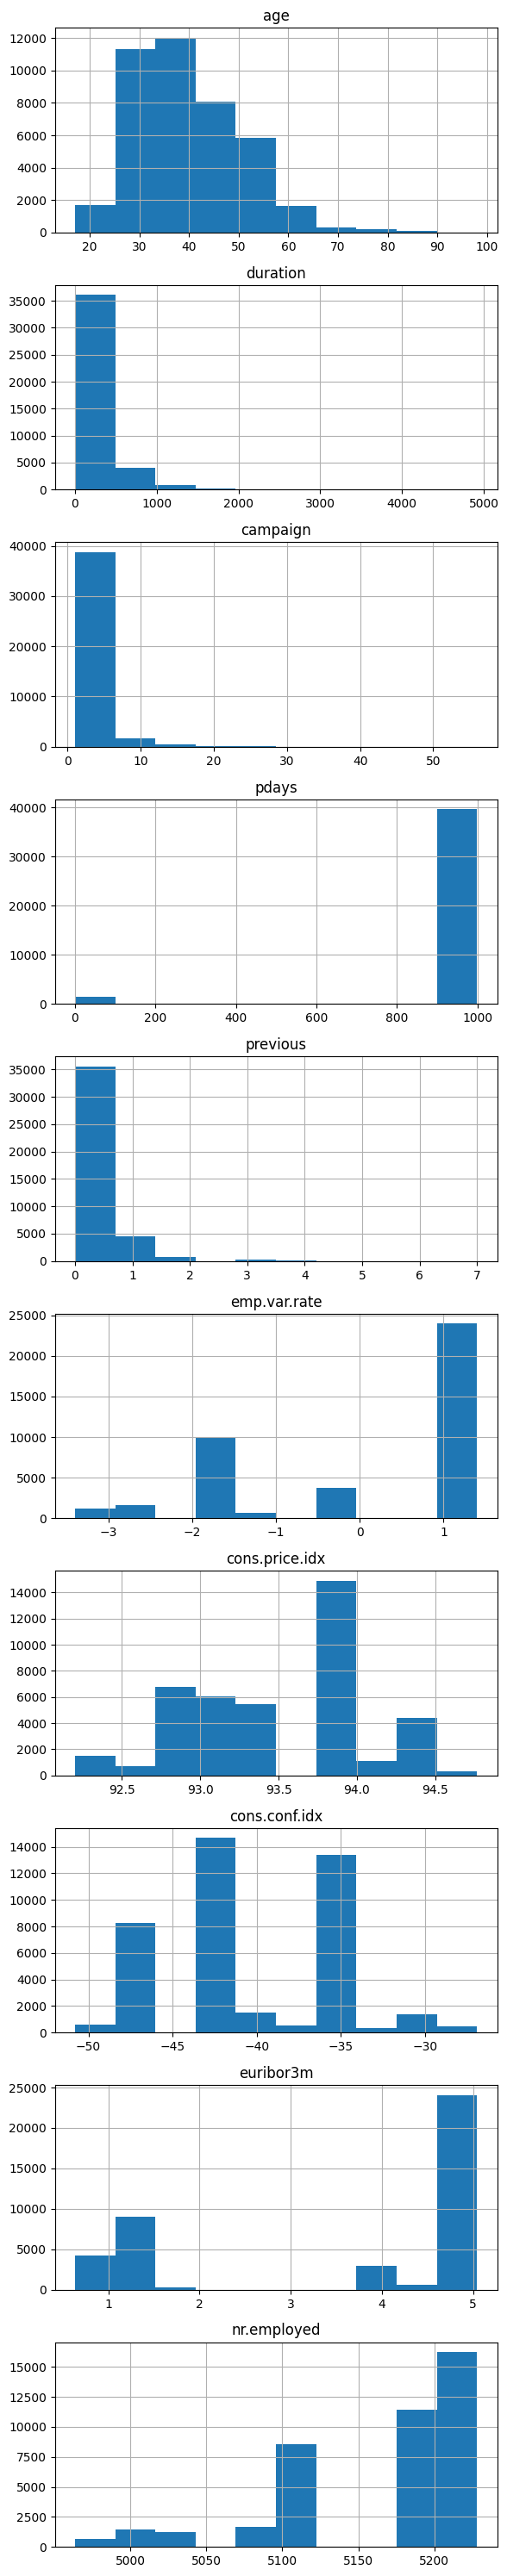

In [ ]:
# histograms of continuous variables
fig, axes = plt.subplots(nrows=len(df.select_dtypes(include=['int64', 'float64']).columns), figsize=(6, 3*len(df.select_dtypes(include=['int64', 'float64']).columns)))
df.select_dtypes(include=['int64', 'float64']).hist(ax=axes)

plt.tight_layout()
plt.show()

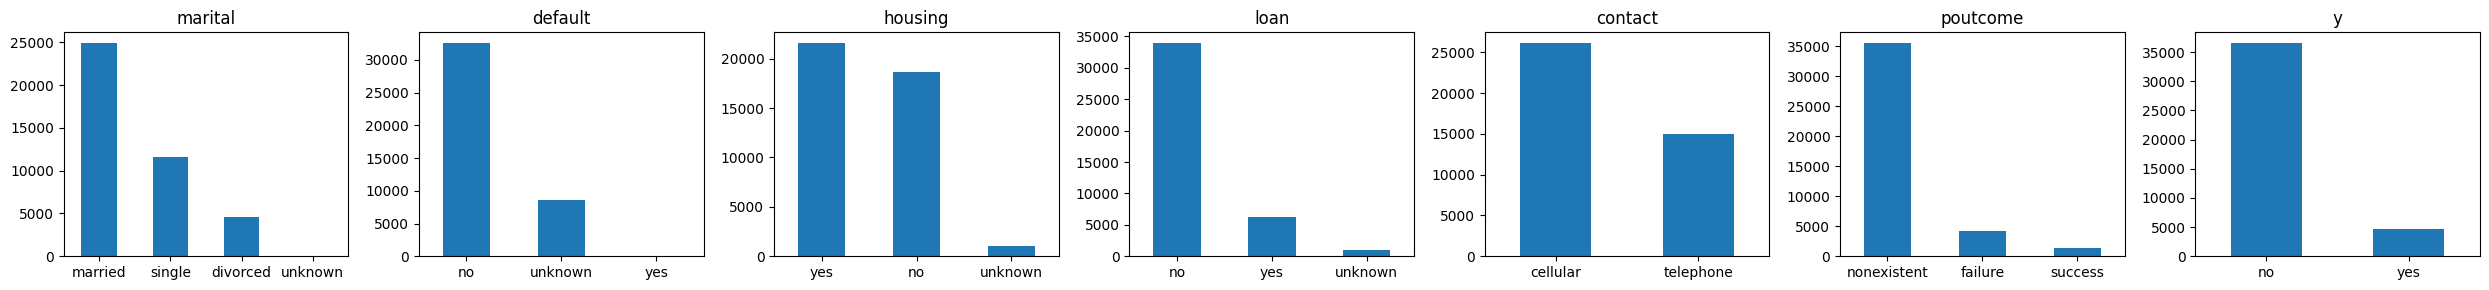

In [ ]:
# histogram of categorical variables
categorical_features = ["marital", "default", "housing","loan","contact","poutcome","y"]
fig, ax = plt.subplots(1, len(categorical_features), figsize=(25,3))

for i, categorical_feature in enumerate(df[categorical_features]):
    df[categorical_feature].value_counts().plot(kind="bar", ax=ax[i], rot=0).set_title(categorical_feature)

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

# Check for high correlations
correlation_matrix = df.corr().abs()

# Get pairs of highly correlated features
high_corr_var = np.where(correlation_matrix > 0.6)
high_corr_var = [(correlation_matrix.columns[x], correlation_matrix.columns[y])
                 for x, y in zip(*high_corr_var) if x != y and x < y]
print("Highly correlated pairs:", high_corr_var)

# Filter pairs by correlation threshold
threshold = 0.7
high_corr_pairs = {}
for column in correlation_matrix.columns:
    for index in correlation_matrix.index:
        # We'll only consider pairs of different columns and correlations above the threshold
        if column != index and abs(correlation_matrix[column][index]) > threshold:
            # We'll also ensure we don't duplicate pairs (i.e., A-B and B-A)
            sorted_pair = tuple(sorted([column, index]))
            if sorted_pair not in high_corr_pairs:
                high_corr_pairs[sorted_pair] = correlation_matrix[column][index]

# Display the high correlation pairs
for pair, corr_value in high_corr_pairs.items():
    print(f"Correlation between {pair[0]} and {pair[1]}: {corr_value:.2f}")




Highly correlated pairs: [('emp.var.rate', 'cons.price.idx'), ('emp.var.rate', 'euribor3m'), ('emp.var.rate', 'nr.employed'), ('cons.price.idx', 'euribor3m'), ('euribor3m', 'nr.employed')]
Correlation between cons.price.idx and emp.var.rate: 0.78
Correlation between emp.var.rate and euribor3m: 0.97
Correlation between emp.var.rate and nr.employed: 0.91
Correlation between euribor3m and nr.employed: 0.95


<ipython-input-5-5f44a52b7d6e>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr().abs()


<ipython-input-6-09ebc0b85d13>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix2 = df_duplicate.corr().abs()


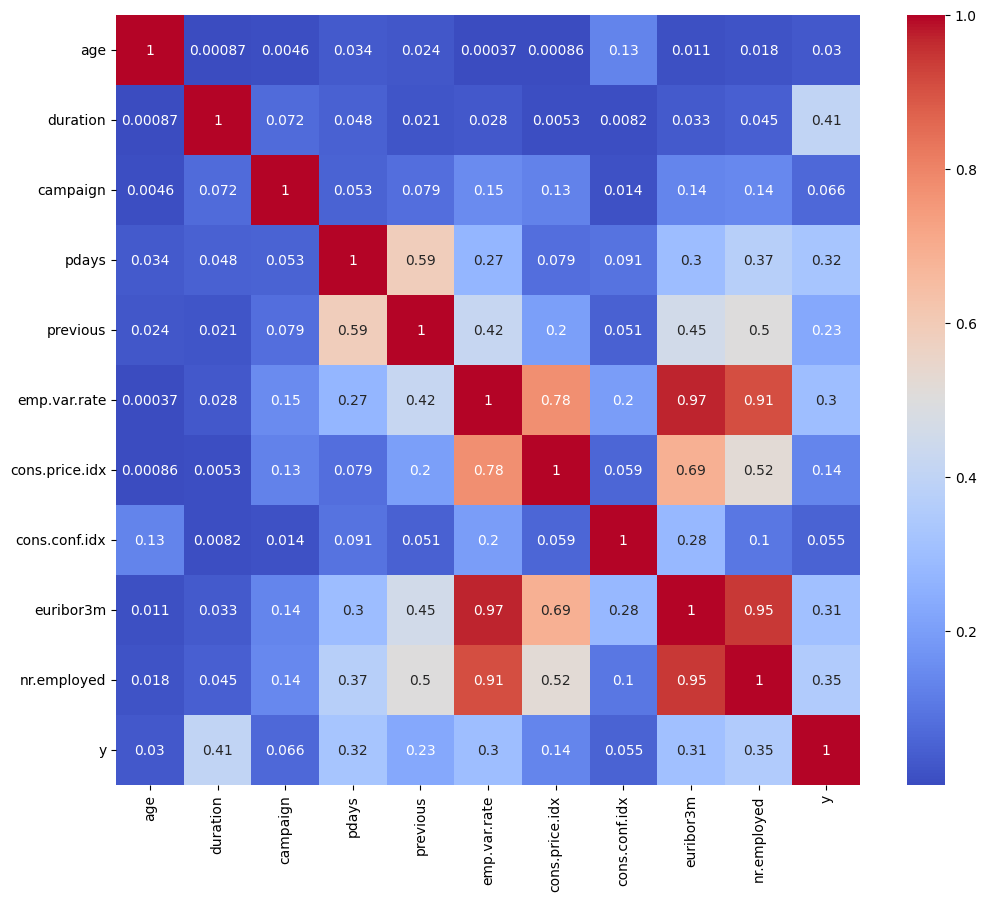

In [ ]:
#Heatmap
import seaborn as sns
df_duplicate = df.copy()
df_duplicate['y'] = df['y'].map({'no': 0, 'yes': 1})
correlation_matrix2 = df_duplicate.corr().abs()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix2, cmap='coolwarm', annot=True)
plt.show()

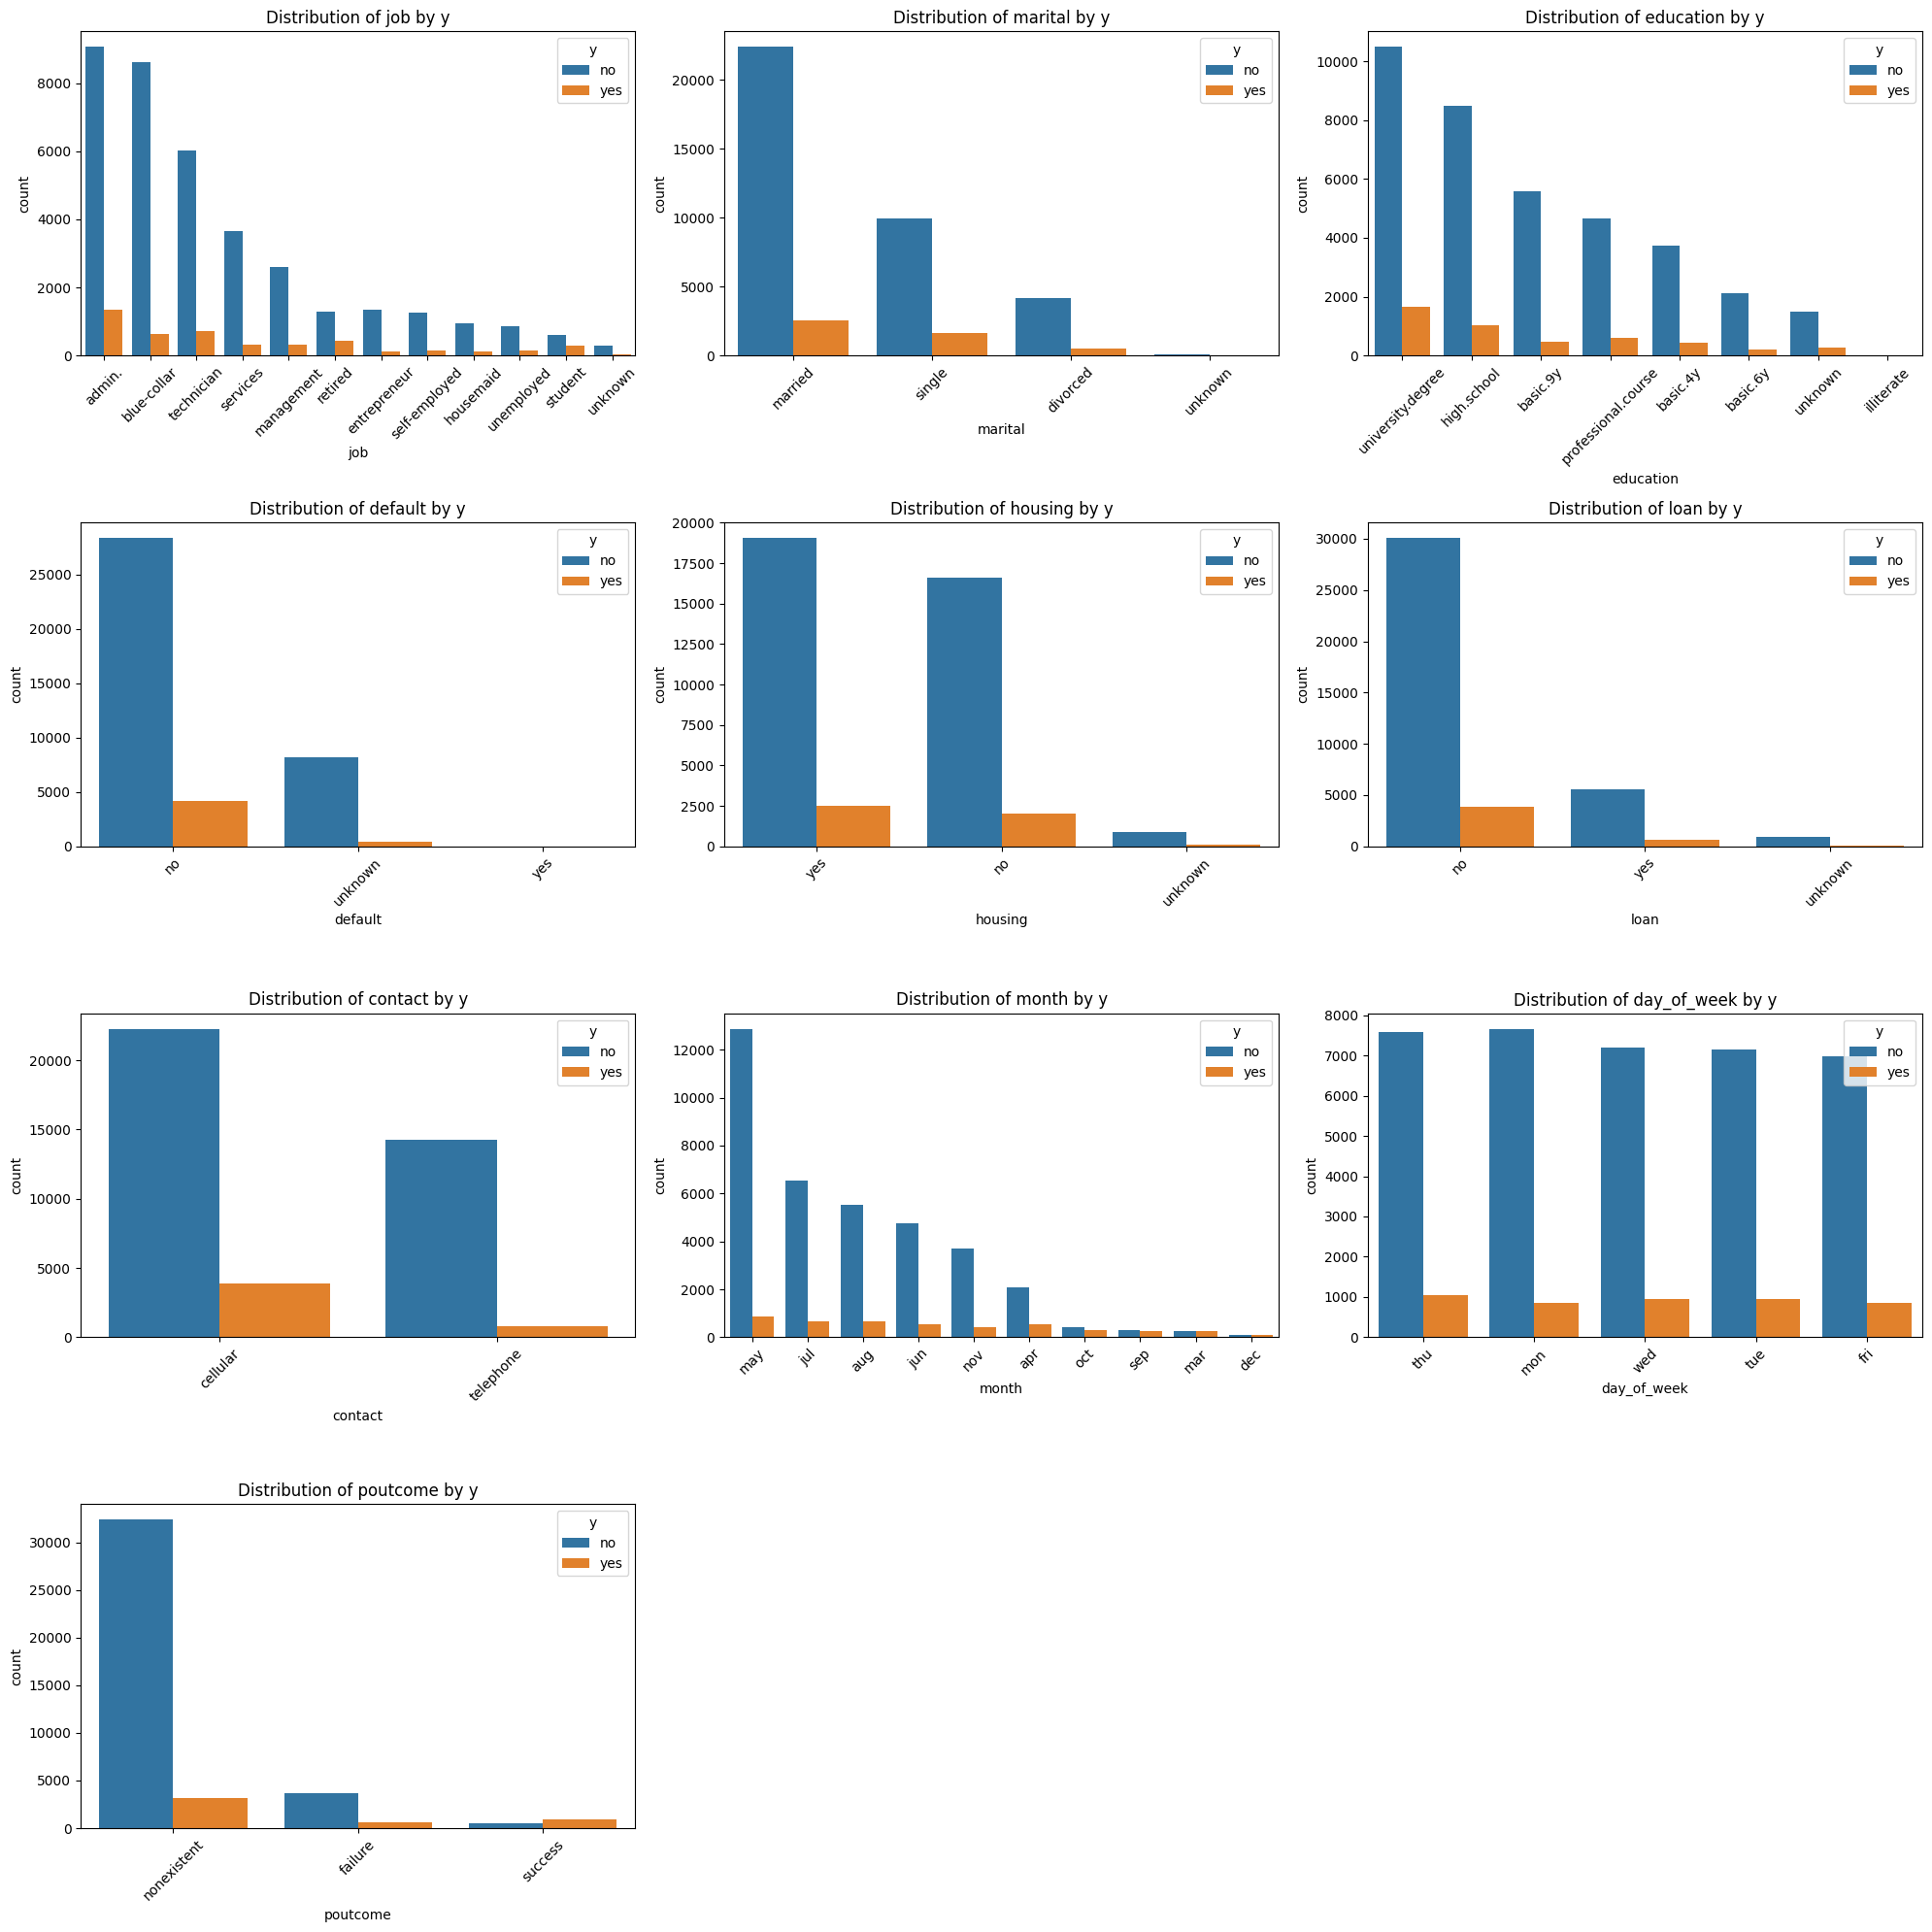

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('y')

# Setting up the figure size
plt.figure(figsize=(20, 20))

# Plotting count plots for each categorical variable with respect to the 'y' column
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4, 3, i)
    sns.countplot(data=df, x=col, hue='y', order=df[col].value_counts().index)
    plt.title(f'Distribution of {col} by y')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

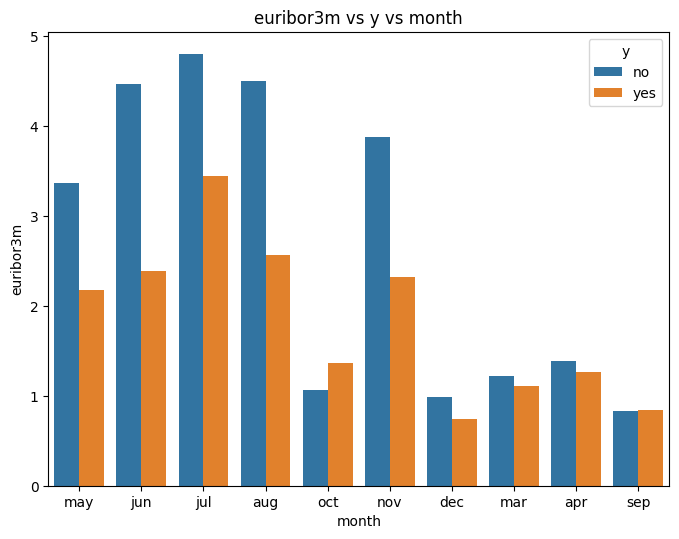

In [ ]:
# Setting up the figure size
plt.figure(figsize=(20, 20))

# Plotting euribor3m vs y vs month using bar chart
plt.subplot(4, 3, 12)  # You can adjust the subplot position as needed
sns.barplot(data=df, x='month', y='euribor3m', hue='y', linewidth=0, errorbar=None)
plt.title('euribor3m vs y vs month')

plt.tight_layout()
plt.show()

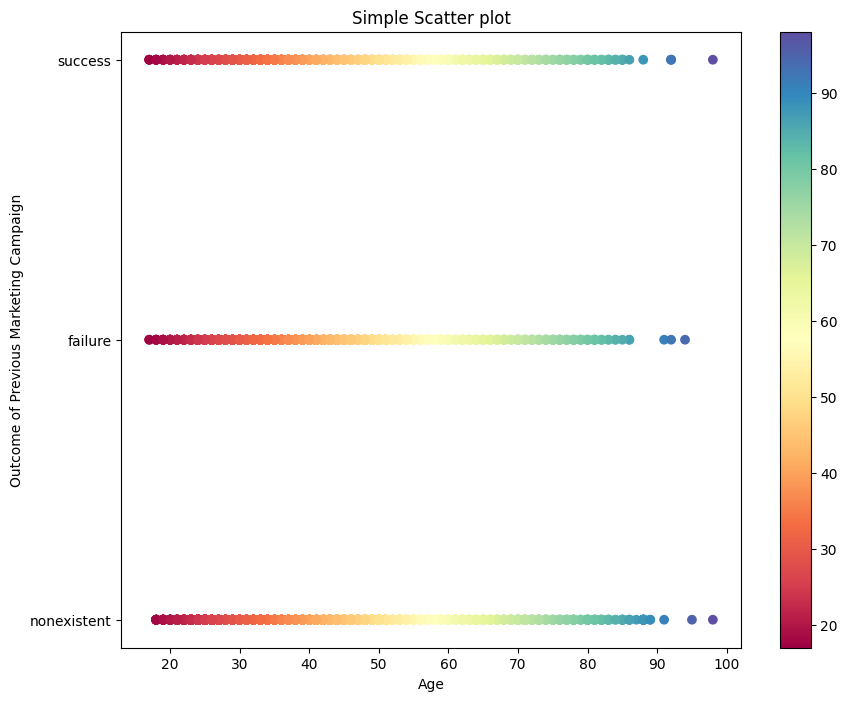

In [ ]:
# Scatter plot
Age = df["age"]
poutcome  = df["poutcome"]

plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.title('Simple Scatter plot')
plt.xlabel('Age')
plt.ylabel('Outcome of Previous Marketing Campaign')

#plt.scatter(Age, Poutcome)
plt.scatter(Age, poutcome, c=Age, cmap='Spectral')
plt.colorbar()

plt.show()


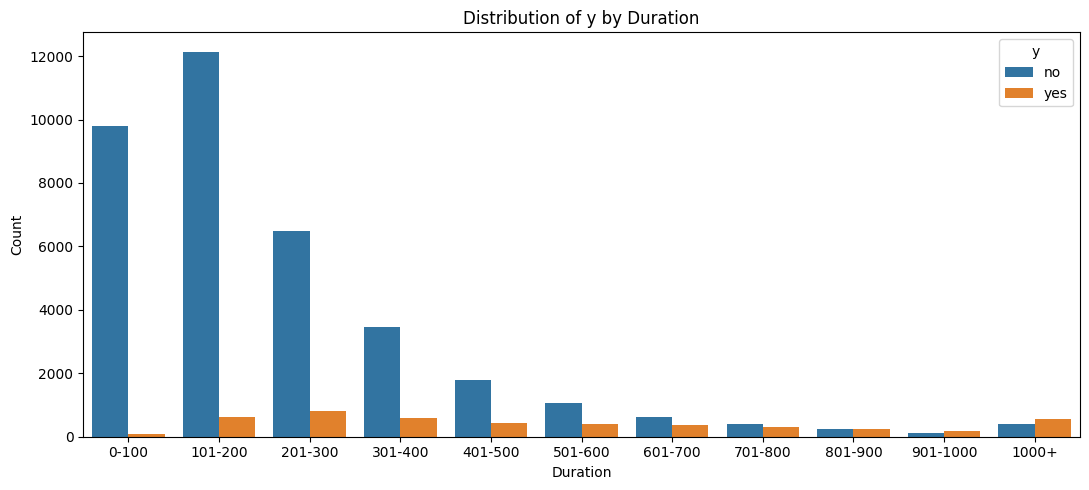

In [ ]:
# Distribution of y by Duration
bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, float('inf')]
labels = ['0-100', '101-200', '201-300', '301-400', '401-500', '501-600', '601-700', '701-800', '801-900', '901-1000', '1000+']
df['binned_duration'] = pd.cut(df['duration'], bins=bins, labels=labels, right=False)
plt.figure(figsize=(11, 5))
sns.countplot(data=df, x='binned_duration', hue='y', order=labels)
plt.title('Distribution of y by Duration')
plt.ylabel('Count')
plt.xlabel('Duration')
plt.tight_layout()
plt.show()

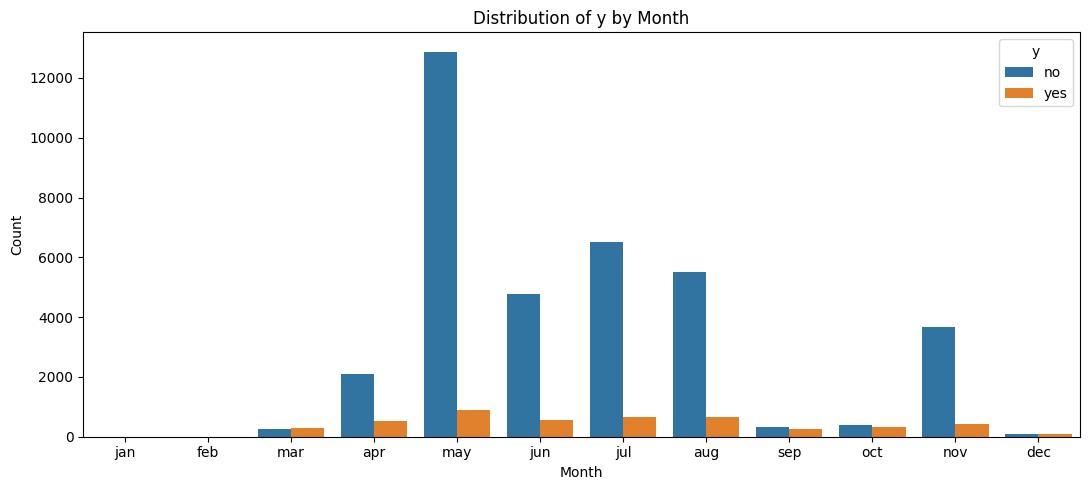

In [ ]:
# Distribution of y by Month
plt.figure(figsize=(11, 5))
sns.countplot(data=df, x='month', hue='y', order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
plt.title('Distribution of y by Month')
plt.ylabel('Count')
plt.xlabel('Month')
plt.tight_layout()
plt.show()

**Data Preparation**

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset and drop duplicates
df = pd.read_csv("bank-additional-full.csv", delimiter=";").drop_duplicates()

# Convert the 'y' column to dummy variables
y = pd.get_dummies(df['y'], drop_first=True)

# Process client-related data
bank_client = df.iloc[:, 0:7]
labelencoder_X = LabelEncoder()
columns_to_encode = ['job', 'marital', 'education', 'default', 'housing', 'loan']
for col in columns_to_encode:
    bank_client[col] = labelencoder_X.fit_transform(bank_client[col])

# Process bank-related data
bank_related = df.iloc[:, 7:11]
columns_to_encode = ['contact', 'month', 'day_of_week']
for col in columns_to_encode:
    bank_related[col] = labelencoder_X.fit_transform(bank_related[col])

# Process sociol & economic data (se) and other bank data (others)
bank_se = df.loc[:, ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
bank_others = df.loc[:, ['campaign', 'pdays', 'previous', 'poutcome']]
bank_others['poutcome'].replace(['nonexistent', 'failure', 'success'], [1, 2, 3], inplace=True)

# Concatenate all the processed parts, reorder columns, and save to CSV
bank_final = pd.concat([bank_client, bank_related, bank_se, bank_others, y], axis=1)
columns_order = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month',
                 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
                 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'yes']
bank_final = bank_final[columns_order]

bank_final.to_csv('bank_final.csv', index=False)

# Display basic information about the final dataframe
print(bank_final.shape)
print(bank_final.head())
print(bank_final.info())
print(bank_final.describe())

# Check for any null values in the DataFrame
datacheck = bank_final.isnull().any()
print(datacheck)

count = bank_final['yes'].value_counts()
print(count)


(41176, 21)
   age  job  marital  education  default  housing  loan  contact  month  \
0   56    3        1          0        0        0     0        1      6   
1   57    7        1          3        1        0     0        1      6   
2   37    7        1          3        0        2     0        1      6   
3   40    0        1          1        0        0     0        1      6   
4   56    7        1          3        0        0     2        1      6   

   day_of_week  ...  campaign  pdays  previous  poutcome  emp.var.rate  \
0            1  ...         1    999         0         1           1.1   
1            1  ...         1    999         0         1           1.1   
2            1  ...         1    999         0         1           1.1   
3            1  ...         1    999         0         1           1.1   
4            1  ...         1    999         0         1           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  yes  
0          93.994          -

**Train Test split with Undersampling to bring 0 to 10,000 and Oversampling to bring 1 to 10,000**

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler

# drop 'y' to get the features
x = bank_final.drop('yes', axis=1)
y = bank_final['yes']

# Split bank_final into training and testing sets (80%-20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(x_train.shape)
print(x_test.shape)

# Apply SMOTE to oversample class 1 to 10,000 samples
smote_strategy = {1: 10000}
smote = SMOTE(sampling_strategy=smote_strategy, random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Apply RandomUnderSampler to undersample class 0 to 10,000 samples
undersample_strategy = {0: 10000}
undersampler = RandomUnderSampler(sampling_strategy=undersample_strategy, random_state=42)
x_train_resampled, y_train_resampled = undersampler.fit_resample(x_train_resampled, y_train_resampled)

# Check the new class distribution
print(y_train_resampled.value_counts())

# Check for NaN values in x_train_resampled after resampling
nan_values = x_train_resampled.isnull().sum()
print("\nNumber of NaN values in each column:")
print(nan_values)

# If there are any NaN values, print the columns that contain them
nan_columns = nan_values[nan_values > 0].index.tolist()
if nan_columns:
    print("\nColumns with NaN values:", nan_columns)
else:
    print("\nThere are no NaN values in the resampled data.")

# Before resampling
print(y_train.value_counts())

# After resampling
print(y_train_resampled.value_counts())

# Scale the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_resampled)
x_test_scaled = scaler.transform(x_test)
y_train_scaled = y_train_resampled #No scaling was done one y_trained_resampled.Changing name was purely for uniformity

(32940, 20)
(8236, 20)
0    10000
1    10000
Name: yes, dtype: int64

Number of NaN values in each column:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

There are no NaN values in the resampled data.
0    29272
1     3668
Name: yes, dtype: int64
0    10000
1    10000
Name: yes, dtype: int64


Construct Logistic Regression Model

In [ ]:
#Modelling:
#import model function, set parameters; model training;
#check modelling results, interpret the model;  model performance evaluation


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the logistic regression model
clf = LogisticRegression(max_iter=1000, random_state=42) # clf = classifier

# Train the model using the resampled training data
LR_model = clf.fit(x_train_scaled, y_train_scaled)

#show the modelling results
print(LR_model.coef_, LR_model.intercept_)

# Show the modelling results
print("Coefficients:", LR_model.coef_)
print("Intercept:", LR_model.intercept_)

# Model Performance Evaluation
# Predict using the scaled test data
y_pred = LR_model.predict(x_test_scaled)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy:.2f}")



[[-0.06961615 -0.04546995 -0.14137731  0.04615929 -0.391883   -0.14609429
  -0.16118773 -0.50895487 -0.50815767 -0.13689343  2.50778412 -0.25586909
  -1.1472839  -0.1023189  -0.74247947 -2.46957194  0.24890621 -0.10949592
   3.26684099 -2.63161928]] [0.1533061]
Coefficients: [[-0.06961615 -0.04546995 -0.14137731  0.04615929 -0.391883   -0.14609429
  -0.16118773 -0.50895487 -0.50815767 -0.13689343  2.50778412 -0.25586909
  -1.1472839  -0.1023189  -0.74247947 -2.46957194  0.24890621 -0.10949592
   3.26684099 -2.63161928]]
Intercept: [0.1533061]
Accuracy on the test set: 0.85


In [ ]:
import statsmodels.api as sm

# Initialize the logistic regression model
clf = LogisticRegression(max_iter=1000, random_state=42) # clf = classifier

# Train the model using the resampled training data
LR_model = clf.fit(x_train_scaled, y_train_scaled)

# Display the coefficients and intercept
print("Coefficients:", LR_model.coef_)
print("Intercept:", LR_model.intercept_)

# Train a logit model using statsmodels and display the summary
logit_model = sm.Logit(y_train_scaled, sm.add_constant(pd.DataFrame(x_train_scaled, columns=x_train.columns))).fit()
print(logit_model.summary())

Coefficients: [[-0.06961615 -0.04546995 -0.14137731  0.04615929 -0.391883   -0.14609429
  -0.16118773 -0.50895487 -0.50815767 -0.13689343  2.50778412 -0.25586909
  -1.1472839  -0.1023189  -0.74247947 -2.46957194  0.24890621 -0.10949592
   3.26684099 -2.63161928]]
Intercept: [0.1533061]
Optimization terminated successfully.
         Current function value: inf
         Iterations 8


/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2441: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


                           Logit Regression Results                           
Dep. Variable:                    yes   No. Observations:                20000
Model:                          Logit   Df Residuals:                    19979
Method:                           MLE   Df Model:                           20
Date:                Sun, 22 Oct 2023   Pseudo R-squ.:                     inf
Time:                        06:29:45   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1546      0.025      6.158      0.000       0.105       0.204
age               -0.0715      0.026     -2.772      0.006      -0.122      -0.021
job               -0.0463      0.023

In [ ]:
#Model performance evaluation

from sklearn.metrics import confusion_matrix, classification_report

#overall accuracy of the training set and testing set
print(LR_model.score(x_train_scaled, y_train_scaled))
print(LR_model.score(x_test_scaled, y_test))

#confusion matrix for testing set
y_predict = LR_model.predict(x_test_scaled)
print(confusion_matrix(y_test, y_predict)) # testing set
print(classification_report(y_test, y_predict)) # precision=hit-rate, recall=accuracy rate on each class


y_proba = LR_model.predict_proba(x_test_scaled)
for i in range(5):
  print(y_proba[i,:], y_predict[i])

print(y_test.head())


0.8804
0.8549052938319572
[[6247 1018]
 [ 177  794]]
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      7265
           1       0.44      0.82      0.57       971

    accuracy                           0.85      8236
   macro avg       0.71      0.84      0.74      8236
weighted avg       0.91      0.85      0.87      8236

[5.46051021e-05 9.99945395e-01] 1
[0.83409561 0.16590439] 0
[0.11951256 0.88048744] 1
[0.95442595 0.04557405] 0
[0.98109079 0.01890921] 0
36264    1
32672    0
40872    1
32907    0
16464    0
Name: yes, dtype: uint8


[[6247 1018]
 [ 177  794]]


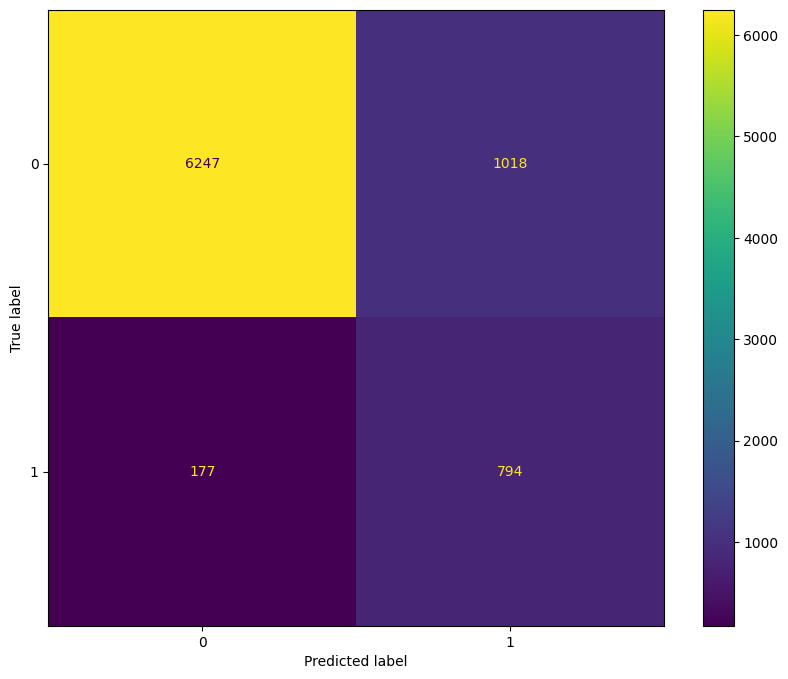

In [ ]:
# Confusion matrix graph
from sklearn.metrics import confusion_matrix
Confusion_Matrix = confusion_matrix(y_test, y_predict)

#simply print out
print(Confusion_Matrix)

from sklearn.metrics import ConfusionMatrixDisplay

#one way
disp = ConfusionMatrixDisplay(confusion_matrix=Confusion_Matrix,
                              display_labels=LR_model.classes_)
disp.plot()
plt.show()


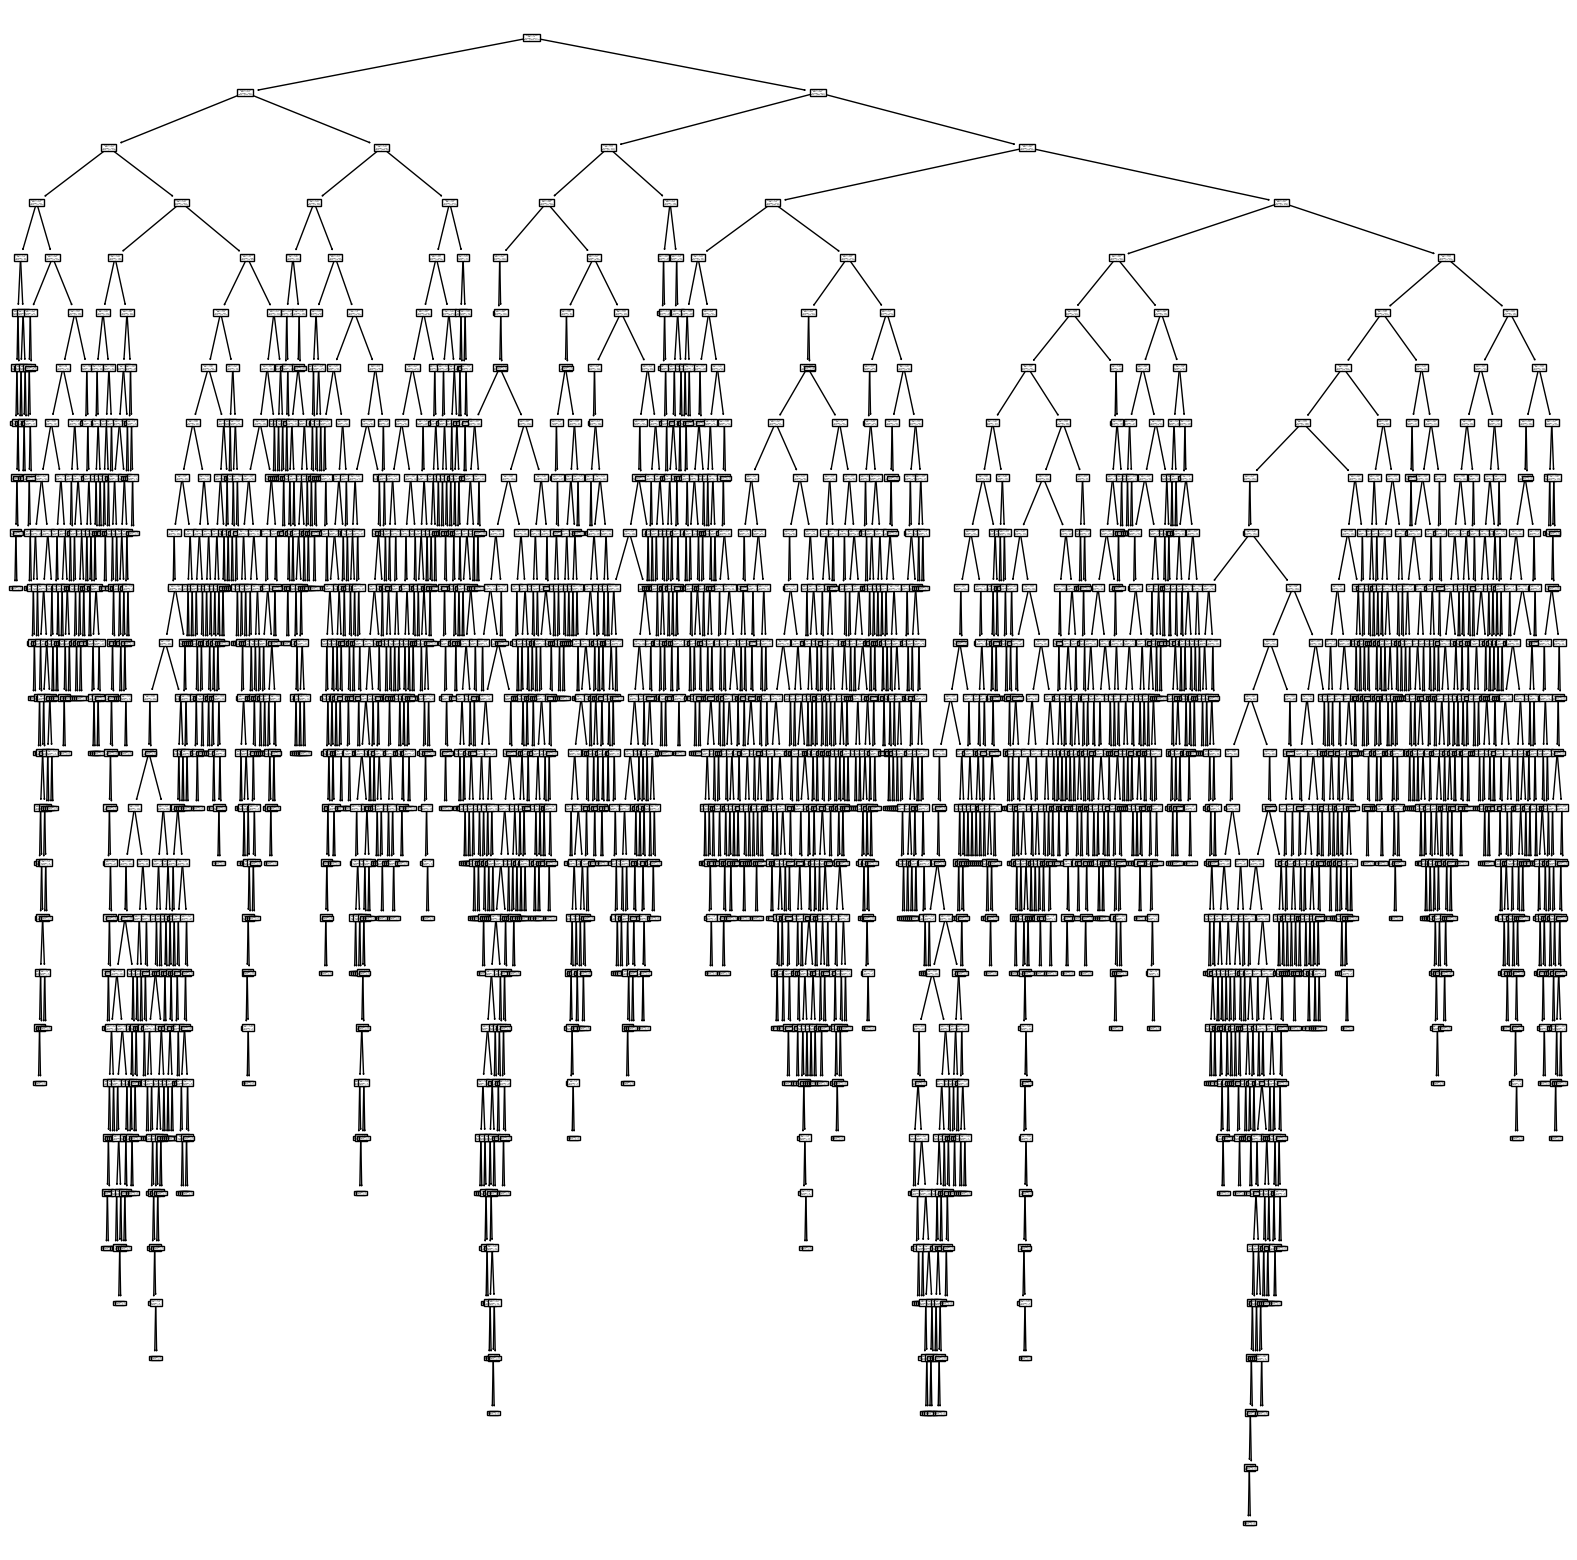

In [ ]:
# train a full decision tree

#from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

clf = DecisionTreeClassifier(random_state=42) # using default setting
DT_model = clf.fit(x_train_scaled, y_train_scaled)

plt.figure(figsize=(20, 20))
plot_tree(DT_model) #plot the tree
plt.show()

In [ ]:
print(DT_model.score(x_train_scaled, y_train_scaled))
print(DT_model.score(x_test_scaled, y_test))

1.0
0.8621903836813988


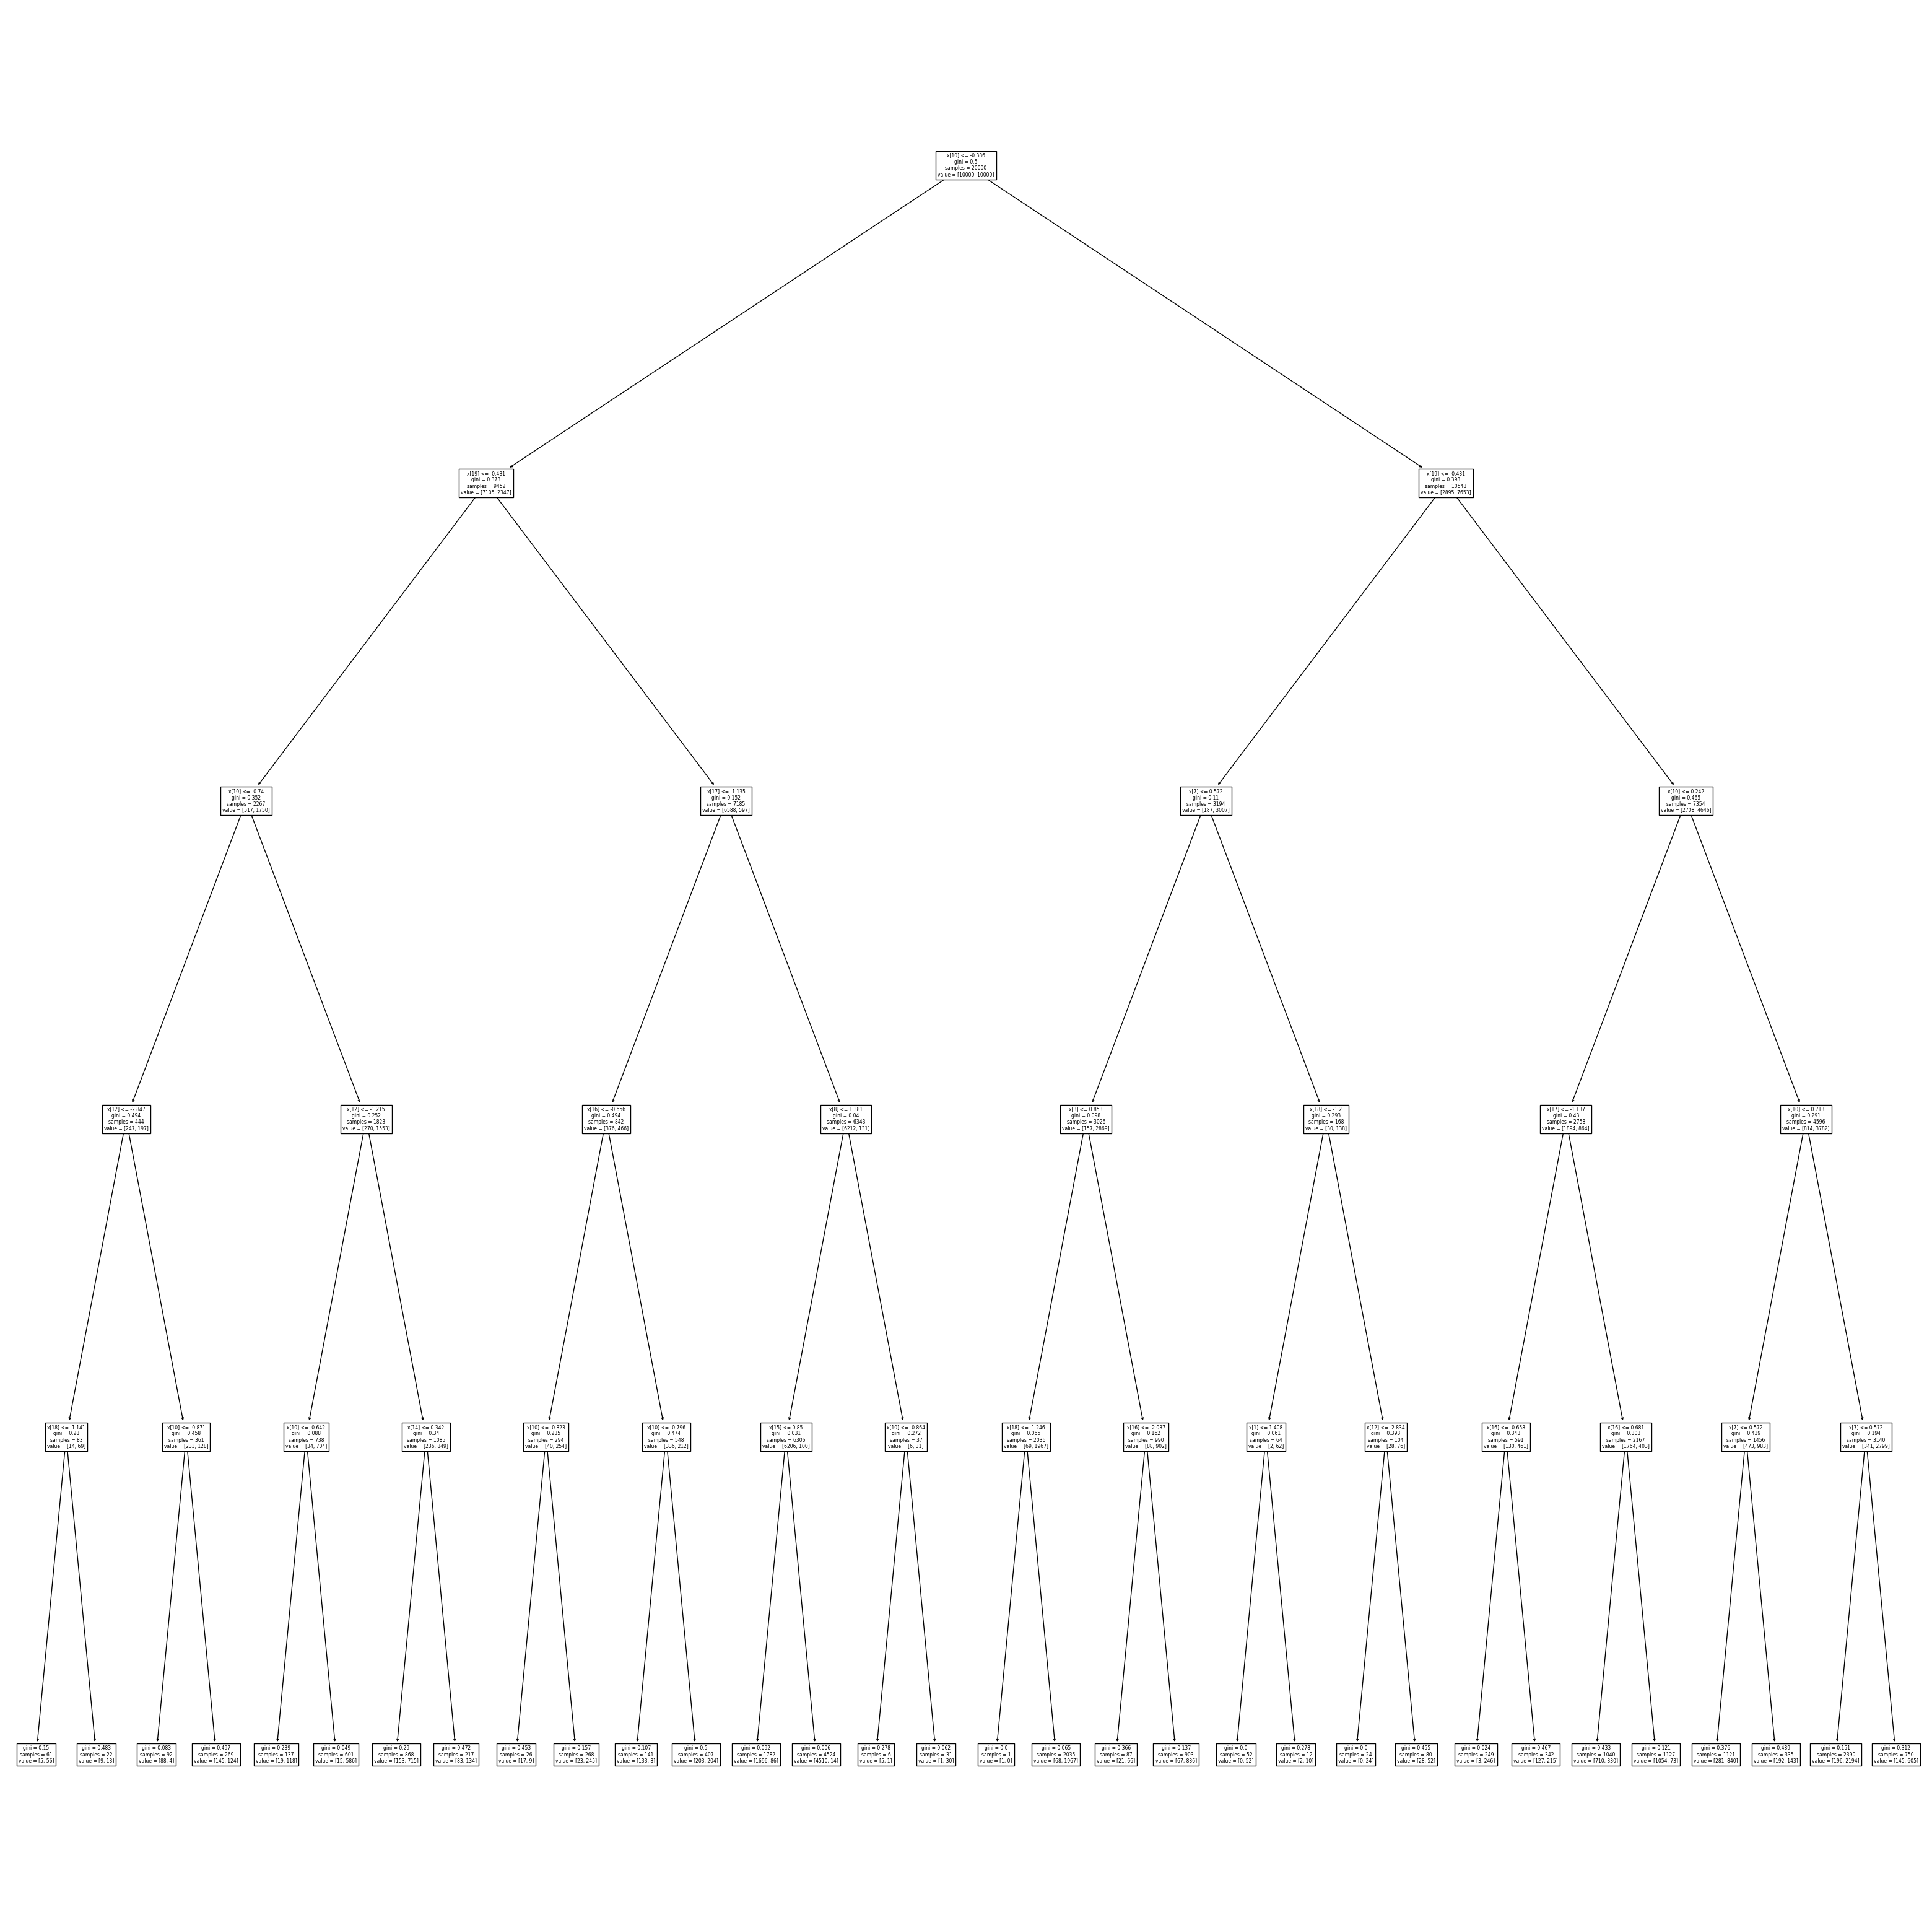

In [ ]:
#control the tree size/tree growth

clf = DecisionTreeClassifier(random_state=42, max_depth=5)# using default setting
DT_model = clf.fit(x_train_scaled, y_train_scaled)

plt.figure(figsize=(40, 40))
plot_tree(DT_model) #plot the tree
plt.show()


In [ ]:
print(DT_model.score(x_train_scaled, y_train_scaled))
print(DT_model.score(x_test_scaled, y_test))

y_predict = DT_model.predict(x_test_scaled)
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

0.88795
0.8506556580864497
[[6153 1112]
 [ 118  853]]
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      7265
           1       0.43      0.88      0.58       971

    accuracy                           0.85      8236
   macro avg       0.71      0.86      0.75      8236
weighted avg       0.92      0.85      0.87      8236



[[6153 1112]
 [ 118  853]]


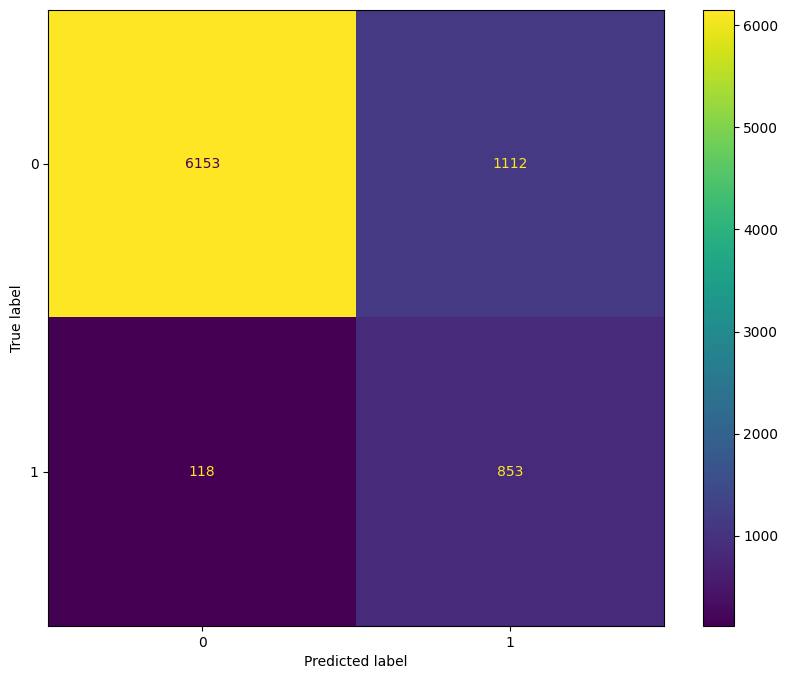

In [ ]:
# Confusion matrix graph
from sklearn.metrics import confusion_matrix
Confusion_Matrix = confusion_matrix(y_test, y_predict)

#simply print out
print(Confusion_Matrix)

from sklearn.metrics import ConfusionMatrixDisplay

#one way
disp = ConfusionMatrixDisplay(confusion_matrix=Confusion_Matrix,
                              display_labels=DT_model.classes_)
disp.plot()
plt.show()


Construct Random Forest Model

In [ ]:
## Train a Random Forest Model
## https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

## parameter settings: n_estimators=100, max_features = "sqrt", random_state=42

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, max_features = "sqrt", random_state=42)

randomforest = clf.fit(x_train_scaled, y_train_scaled)

#evaluation
y_predict = randomforest.predict(x_test_scaled)
print(classification_report(y_test, y_predict))


              precision    recall  f1-score   support

           0       0.98      0.89      0.93      7265
           1       0.50      0.84      0.63       971

    accuracy                           0.88      8236
   macro avg       0.74      0.86      0.78      8236
weighted avg       0.92      0.88      0.89      8236



[[6446  819]
 [ 154  817]]


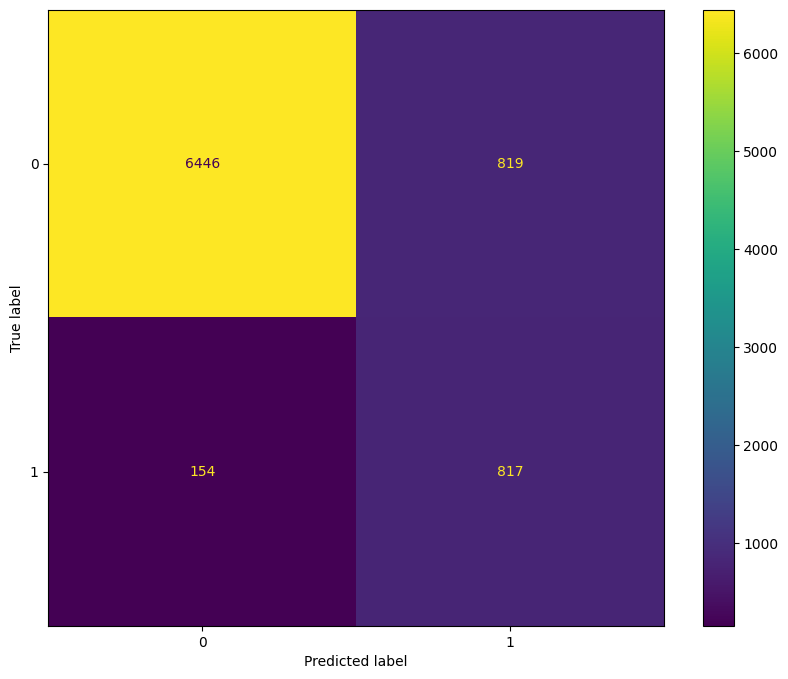

In [ ]:
# Confusion matrix graph
from sklearn.metrics import confusion_matrix
Confusion_Matrix = confusion_matrix(y_test, y_predict)

#simply print out
print(Confusion_Matrix)

from sklearn.metrics import ConfusionMatrixDisplay

#one way
disp = ConfusionMatrixDisplay(confusion_matrix=Confusion_Matrix,
                              display_labels=randomforest.classes_)
disp.plot()
plt.show()


Figuring out the significant variables

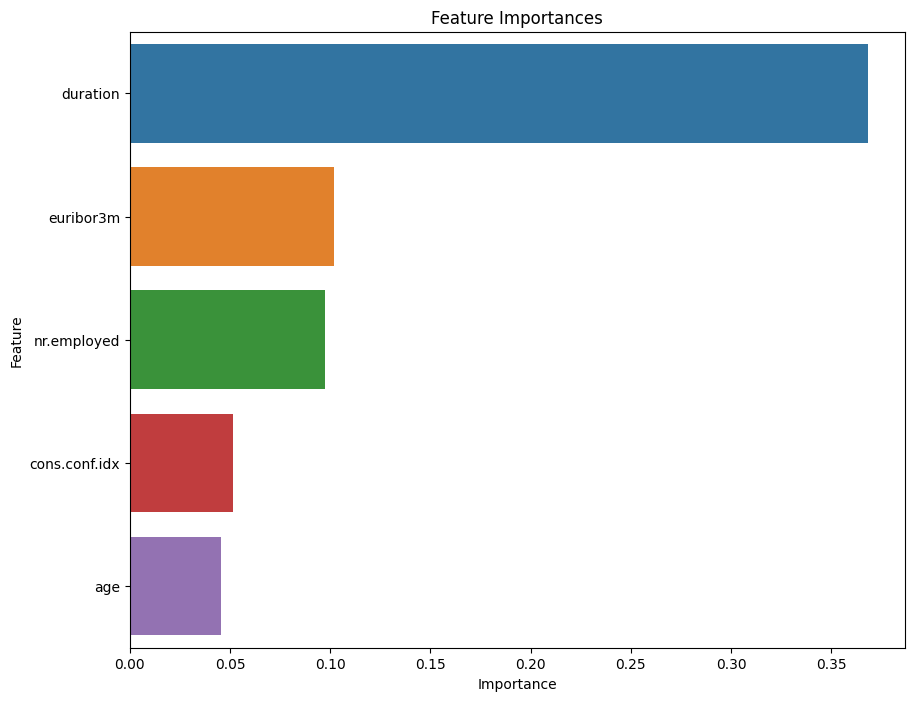

In [ ]:
# Extract feature importances
fi = pd.DataFrame({'feature': list(x.columns),
                   'importance': randomforest.feature_importances_}).\
                    sort_values('importance', ascending = False)
# Display
plt.figure(figsize=(10, len(fi) * 0.4))

# Create the bar plot using seaborn
sns.barplot(x='importance', y='feature', data=fi.head(5))

# Set plot title and labels
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')

# Display the plot
plt.show()

Construct Support Vector Model (SVM)

In [ ]:
from sklearn.svm import SVC # "Support vector classifier" SVR, REGRESSOR

#parameter setting
clf = SVC(kernel='rbf', random_state=42) # kernel: linear, rbf, sigmoid, poly

#modelling
SVC_model = clf.fit(x_train_scaled, y_train_scaled)

#evaluation
y_predict = SVC_model.predict(x_test_scaled)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      7265
           1       0.44      0.86      0.58       971

    accuracy                           0.85      8236
   macro avg       0.71      0.86      0.75      8236
weighted avg       0.91      0.85      0.87      8236



[[6200 1065]
 [ 137  834]]


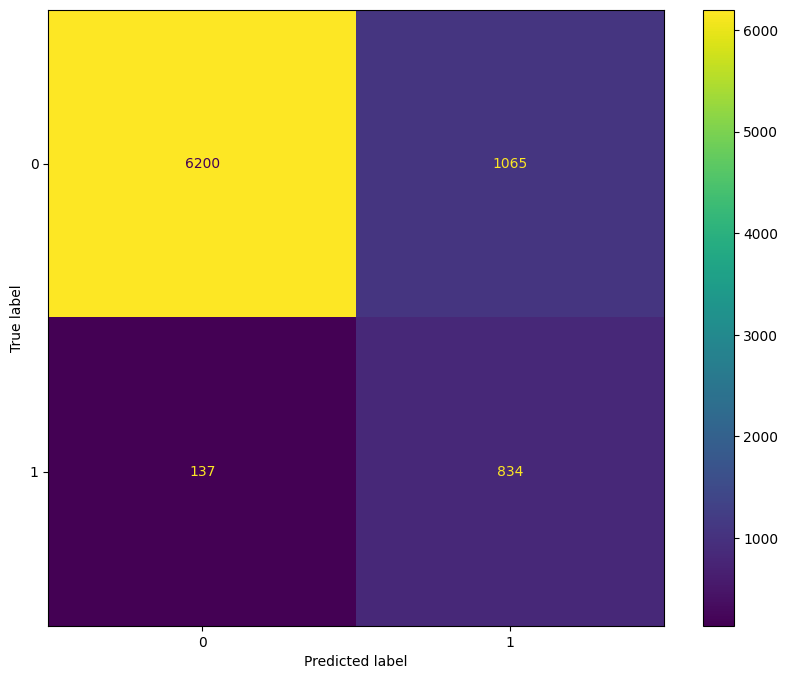

In [ ]:
# Confusion matrix graph
from sklearn.metrics import confusion_matrix
Confusion_Matrix = confusion_matrix(y_test, y_predict)

#simply print out
print(Confusion_Matrix)

from sklearn.metrics import ConfusionMatrixDisplay

#one way
disp = ConfusionMatrixDisplay(confusion_matrix=Confusion_Matrix,
                              display_labels=SVC_model.classes_)
disp.plot()
plt.show()


Construct Multi-layer Perceptron Model (MLP)

In [ ]:
# train a three-layer MLP, which contains 2 hidden layers,
# the 1st hidden layer has 20 neurons, and the 2nd hidden layer has 10 neurons

from sklearn.neural_network import MLPClassifier #MLPRegressor

MLP_Setting = MLPClassifier(
    random_state=1,
    hidden_layer_sizes= (20,10),
    activation = 'relu',
    max_iter=2000)
MLP = MLP_Setting.fit(x_train_scaled, y_train_scaled)
MLP

MLPClassifier(hidden_layer_sizes=(20, 10), max_iter=2000, random_state=1)

In [ ]:
#evaluation
y_predict = MLP.predict(x_test_scaled)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92      7265
           1       0.47      0.83      0.60       971

    accuracy                           0.87      8236
   macro avg       0.72      0.85      0.76      8236
weighted avg       0.92      0.87      0.89      8236



[[6376  889]
 [ 169  802]]


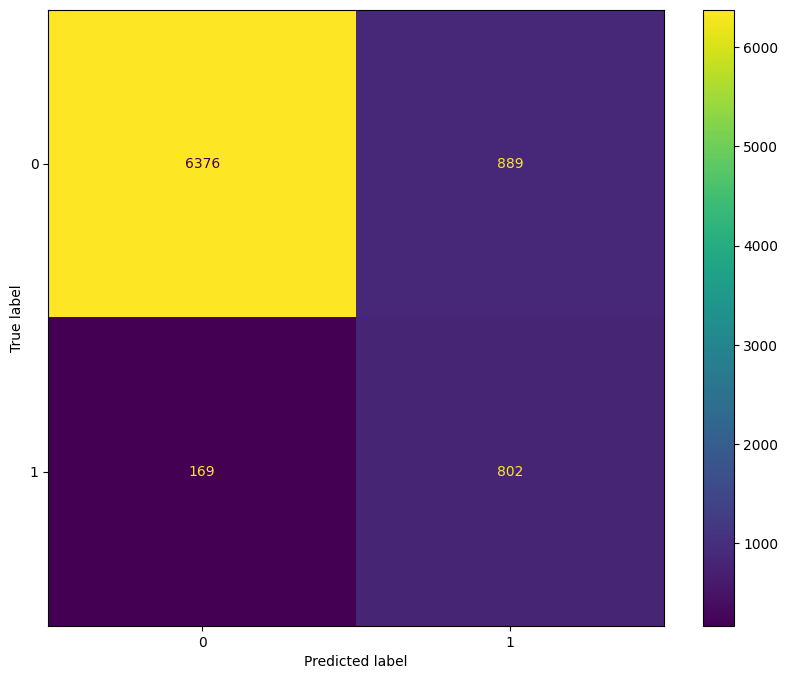

In [ ]:
# Confusion matrix graph
from sklearn.metrics import confusion_matrix
Confusion_Matrix = confusion_matrix(y_test, y_predict)

#simply print out
print(Confusion_Matrix)

from sklearn.metrics import ConfusionMatrixDisplay

#one way
disp = ConfusionMatrixDisplay(confusion_matrix=Confusion_Matrix,
                              display_labels=MLP.classes_)
disp.plot()
plt.show()


Construct Voting Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Initialize the classifiers
log_clf = LogisticRegression(max_iter=5000) # Increase max_iter to help with convergence
rnd_clf = RandomForestClassifier()
svm_clf = SVC(probability=True)  # 'probability=True' is required for soft voting
dt_clf = DecisionTreeClassifier()
mlp_clf = MLPClassifier(max_iter=5000) # Increase max_iter to help with convergence

# Create the ensemble classifier
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf),
                ('dt', dt_clf), ('mlp', mlp_clf)],
    voting='soft'
)

# Fit the ensemble classifier to the resampled data
voting_clf.fit(x_train_scaled, y_train_scaled)

# Initialize an empty list to store scores
scores = []

# Train and evaluate each classifier
for clf in (log_clf, rnd_clf, svm_clf, dt_clf, mlp_clf, voting_clf):
    clf.fit(x_train_scaled, y_train_scaled)
    y_pred = clf.predict(x_test_scaled)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))


LogisticRegression 0.8549052938319572
RandomForestClassifier 0.8821029626032054
SVC 0.8540553666828558
DecisionTreeClassifier 0.8668042739193783
MLPClassifier 0.8698397280233123
VotingClassifier 0.8757892180670228


In [ ]:
import plotly.express as px

# Define the classifier names
classifier_names = [
    'Logistic Regression', 'Random Forest', 'SVM', 'Decision Tree', 'MLP', 'Voting Classifier'
]

# Create a DataFrame to store model scores
models = pd.DataFrame({
    'Model': classifier_names,
    'Score': scores
})

# Sort models by their score
models = models.sort_values(by='Score', ascending=False)

# Visualize the scores using plotly
fig = px.bar(data_frame=models, x='Score', y='Model', color='Score', color_continuous_scale='Spectral', template='plotly_white', title='Models Comparison')
fig.show()



